In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

filePath1 = "raw_data/city_data.csv"
filePath2 = "raw_data/ride_data.csv"

cityDF = pd.read_csv(filePath1, encoding="iso-8859-1", low_memory=False)
rideDF = pd.read_csv(filePath2, encoding="iso-8859-1", low_memory=False)

In [95]:
#Average Fare ($) Per City
cityGroup = rideDF.groupby("city")
avgFare = cityGroup["fare"].mean()

#Total Number of Rides Per City
cityRides = cityGroup["city"].count()

interDF = pd.DataFrame({"Average Fare":avgFare,
                        "Number of Rides": cityRides})

#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)
interDF = interDF.reset_index()
cityDF = cityDF.reset_index()
rideInfo = pd.merge(interDF, cityDF, on="city")
del rideInfo["index"]

rideInfo = rideInfo.rename(columns={"city":"City",
                                 "driver_count":"Number of Drivers",
                                 "type":"City Type"})

rideInfo.head()

,City,Average Fare,Number of Rides,Number of Drivers,City Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [96]:
urban = rideInfo["City Type"] == "Urban"
urban = rideInfo[urban]

suburban = rideInfo["City Type"] == "Suburban"
suburban = rideInfo[suburban]

rural = rideInfo["City Type"] == "Rural"
rural = rideInfo[rural]


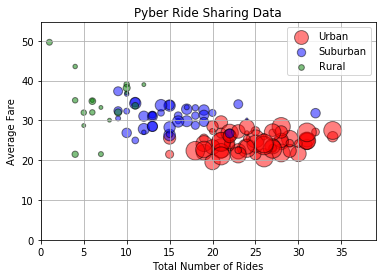

In [97]:
xAxisUrban = urban["Number of Rides"]
yAxisUrban = urban["Average Fare"]
plt.scatter(xAxisUrban,yAxisUrban,s=urban["Number of Drivers"]*5, facecolors = "red", edgecolors = "black",
            label="Urban", alpha = .5)

xAxisSuburban = suburban["Number of Rides"]
yAxisSuburban = suburban["Average Fare"]
plt.scatter(xAxisSuburban,yAxisSuburban,s=suburban["Number of Drivers"]*5,facecolors="blue",edgecolors="black",
            label="Suburban",alpha = .5)

xAxisRural = rural["Number of Rides"]
yAxisRural = rural["Average Fare"]
plt.scatter(xAxisRural,yAxisRural,s=rural["Number of Drivers"]*5, facecolors = "green", edgecolors = "black",
            label="Rural",alpha = .5)

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")


#plt.figure(figsize=(400, 400))
plt.grid('on')
plt.legend()
xMax = rideInfo["Number of Rides"].max()
yMax = rideInfo["Average Fare"].max()
plt.xlim(0,xMax+5)
plt.ylim(0,yMax+5)

plt.show()

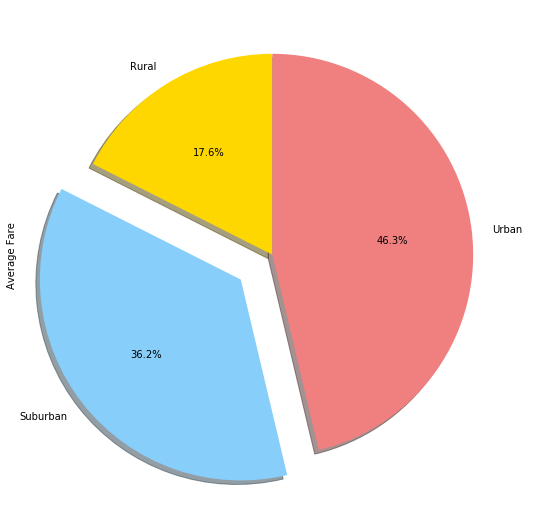

In [98]:
# % of Total Fares by City Type Pie Chart
cityTypeFares = rideInfo.groupby("City Type")
cityTypeFaresPlot = cityTypeFares["Average Fare"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
plt.axis("equal")
explode = (0, 0.2, 0)
testChart = cityTypeFaresPlot.plot(kind="pie",explode=explode,figsize=(9,9),colors=colors,shadow = 2,
                                   autopct="%1.1f%%",startangle=90)
plt.show()

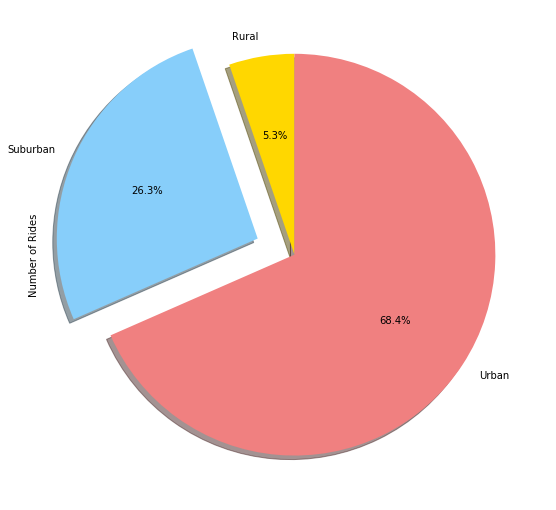

In [99]:
# % of Total Rides by City Type
cityTypeRides = rideInfo.groupby("City Type")
cityTypeRidesPlot = cityTypeRides["Number of Rides"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
plt.axis("equal")
explode = (0, 0.2, 0)
testChart = cityTypeRidesPlot.plot(kind="pie",explode=explode,figsize=(9,9),colors=colors,shadow = 2,
                                   autopct="%1.1f%%",startangle=90)
plt.show()

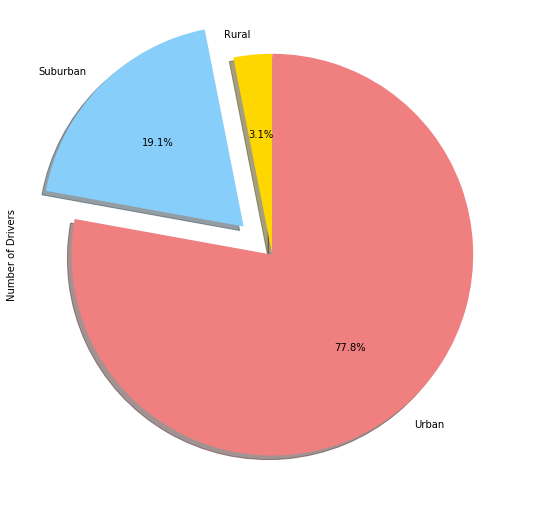

In [100]:
# % of Total Drivers by City Type Pie Chart
cityTypeDrivers = rideInfo.groupby("City Type")
cityTypeDriversPlot = cityTypeDrivers["Number of Drivers"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
plt.axis("equal")
explode = (0, 0.2, 0)
testChart = cityTypeDriversPlot.plot(kind="pie",explode=explode,figsize=(9,9),colors=colors,shadow = 2,
                                   autopct="%1.1f%%",startangle=90)
plt.show()

In [101]:
title = "Ride Sharing Observations:"
observation1 = "1. There is a directly proprtional relationship between the number of people who use ride sharing and the population of that city."
observation2 = "2. People in smaller towns tend to travel further distances, thus increasing the total price for the fares."
observation3 = "3. People in cities tend to pay the least amount when traveling, but the frequency ends up making it the most profitable."
observations = title + "\n\n" + observation1 + "\n" + observation2 + "\n" + observation3
f = open('README.md','w')
f.write(observations)
f.close()
print("Done!")

Done!
